<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 3:</span> Principal Component Analysis</h1>
<hr>


Principal Component Analysis, or PCA, seeks to create new features from linear combinations of the original ones. These new features, called **principal components**, are meant to maximize the **"explained variance,"** that is retatin the predicitve power of our model.

* PCA is especially effective when you have many correlated features. That is because if you have many correlated features, you can use PCA to capture the key axes of variance and drastically reduce the number of features.


Aim:
* Prepare individual item features for our clustering algorithms, using PCA to reduce data dimensionality.
    * Important: PCA creates new features that **replace** the original ones.


Summary:
1. [Toy example: oval blob](#oval-blob)
2. [Principal components](#components)
3. [Dimensionality reduction](#reduction)
4. [Item data PCA](#item-data)
5. [Explained variance](#explained-variance)

In [5]:
# Imporitng Ze libraries

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline
# Seaborn for easier visualization
import seaborn as sns
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

importing the full item data that we saved before applying thresholds
* we'll pass in <code style="color:steelblue">index_col=0</code> to treat the first column (CustomerID) as the index.

In [8]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv', index_col=0)

Just to confirm, our dataset should have 2574 features:

In [9]:
# Display item_data shape
item_data.shape

(414, 2574)

# 1. Toy example: oval blob

PCA is an elegant technique that's very practical, but it can be a bit hard to understand right away.

Using a toy example to break down the intuition behind PCA.

**We'll create an "oval blob" synthetic dataset.**
* Instead of both input features and a target variable, we'll only have 2 input features.
* $x_1$ will be random samples from a normal distribution.
* $x_2$ will be random samples from a normal distribution **plus $x_1$**.

In [11]:
# Set random seed
np.random.seed(101)
# Create first feature: x1
x1 = np.random.normal(0,1,100)
# Create second feature: x2
x2 = x1 + np.random.normal(0,1,100)

**Stacking them together to form <code style="color:steelblue">X</code> - the input feature matrix.**

In [21]:
# Stack together as columns
X = np.stack([x1, x2], axis=1)

# Print shape of X
print(X.shape)

(100, 2)


**Creating a scaled version of our feature matrix: <code style="color:steelblue">X_scaled</code>.**

In [24]:
# Initialize our StandardScaler
scale = StandardScaler()
# Fit and apply transform to X
X_scaled = scale.fit_transform(X)
# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

**Plotting a scatterplot of the scaled $x_1$ against the scaled $x_2$.**


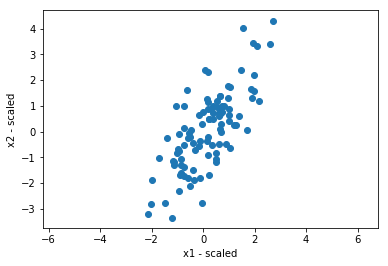

In [28]:
# Plot scatterplot of scaled x1 against scaled x2
plt.scatter(x=X[:,0], y=X[:,1])

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 - scaled')
plt.ylabel('x2 - scaled')

# Clear text residue
%clear
plt.show()

# 2. Principal components

Linear types of distribution are very helpful for visualizing the mechanics behind PCA.

In [30]:
# Initialize instance of PCA transformation
from sklearn.decomposition import PCA

pca = PCA()
# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Displaying the principal components.**

In [31]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Note: We have two principal components (feature vectors).
- The maximum possible number of principal components is either the number of original features or the number of observations in your dataset, whichever is lower.
    - in our case we have # of features as lowest (n=2), thus we have two principal components.
    
**We'll overlay the principal components on our oval blob.**
* So we can see the principal components more easily. For clarity:
    * We'll plot the first principal component in **black**.
    * We'll plot the seconf principal component in <strong style="color:red">red</strong>.

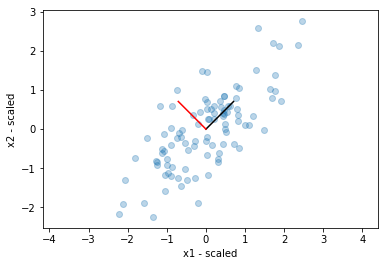

In [35]:
# Plot scaled dataset, using alpha param for partial transparency
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.3)
# Plot first principal component in black
plt.plot([0,pca.components_[0,0]], [0,pca.components_[0,1]], 'k')
# Plot second principal component in red
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]], 'r')
# Set axes
plt.axis('equal')
plt.xlabel('x1 - scaled')
plt.ylabel('x2 - scaled')

# Clear text residue
%clear

The first principal component (in black) represents the "direction" of the most variance in the dataset.
  - the "length" of the oval
   
The second principal component (in red) represents the direction of the most variance in the dataset after accounting for the first principal component.
 - the "width" of the oval



**We'll transform the original features using the fitted PCA instance.**
*  PCA generates new features that **replace** the original ones.

In [40]:
# Generate new features
pca_features = pca.transform(X_scaled)
#display first 5 features
pca_features[:5]

array([[ 3.69608715,  0.22083528],
       [ 0.04456512, -0.58710376],
       [ 0.24068878, -0.77378302],
       [-0.19754788, -0.65917095],
       [ 0.60836281, -0.05474875]])

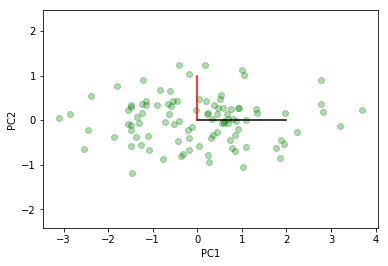

In [41]:
# Plot transformed dataset
plt.scatter(pca_features[:,0], pca_features[:,1],alpha=0.3,color='g')
# Plot first principal component in black
plt.plot([0,2],[0,0],'k')
# Plot second principal component in red
plt.plot([0,0],[0,1],'r')
# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Clear text residue
plt.show()

We see that using PCA, we've still been able capture all of the variance of the original dataset.

A few important things to point out:
* PC1 alone is able to capture the direction of greatest variance.
* And when we keep both PC1 and PC2, we can completely recreate the original dataset.



# 3. Dimensionality reduction

With dimensionality reduction, we aim to keep some number of the "best" components, a.k.a. the ones that explain the most variance.
 - In short, we dont need to keep all of the principal components. Only the ones that explain the most variance.

Note: PCA creates a sequence of principal components and each one tries to capture the most variance after accounting for the ones before it.

**Displaying the "explained variance" ratio of each component.**

In [47]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([ 0.86915841])

* the first principal component captured almost 87% of the total variance in the dataset

**To keep only 1 component, we can simply initialize and fit another PCA transformation.**
   - using the argument <code style="color:steelblue">n_components=1</code>.

In [48]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678]])

Now if we create the new features, it only creates from the first principle component feature (PC1).

In [50]:
# Generate new features
PC = pca.transform(X_scaled)
PC.shape

(100, 1)

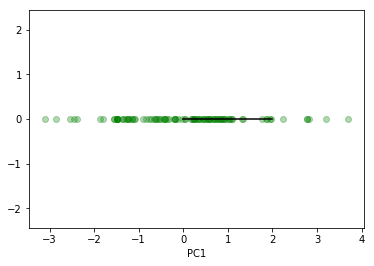

In [56]:
# Plot transformed dataset
plt.scatter(PC[:,0], len(PC)*[0],alpha=0.3,color='g')
# Plot first principal component in black
plt.plot([0,2],[0,0],'k')
# Set axes
plt.axis('equal')
plt.xlabel('PC1')
# Clear text residue
plt.show()

# 4. Item data PCA

Getting back to our original dataset. We shall apply PCA in just the same way we did it to our toy data.

**Scaling first the <code style="color:crimson">item_data</code> we imported in the beginning**

In [57]:
# Initialize instance of StandardScaler
from sklearn.preprocessing import StandardScaler
# Fit and transform item_data
scale = StandardScaler()
item_scaled_data = scale.fit_transform(item_data)
# Display first 5 rows of item_data_scaled
item_scaled_data[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

**Initializing and fitting an instance of the PCA transformation.**
* Keep all of the components for now.

In [60]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Generating new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**
* Name the new array <code style="color:crimson">PC_items</code>.

In [61]:
# Generate new features
pc_data = pca.transform(item_scaled_data)

# Display first 5 rows
pc_data[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   6.57807142e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.66807279e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -2.21567556e-15],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,   4.87023616e-16],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   4.10782519e-15]])

# 5. Explained variance

PCA finds a sequence of principal components that try to explain as much variance as possible.

PC1 would explain the most variance.
PC2 would explain the 2nd-most variance.
PC3 would explain the 3rd-most variance.
And so on...

**It's very helpful to calculate and plot the <u>cumulative</u> explained variance.**
* This tells us the total amount of variance we'd capture if we kept up to the n-th component.
* we'll calculate the cumulative explained variance.

displaying the explained variance ratio for each of the principal components.

In [64]:
# Sum of explained variance ratio
pca.explained_variance_ratio_.sum()

1.0000000000000002

Plotting our cumulative explained variance so we can see the least amount PC features we'd need to keep in order to capture most of the original variance.

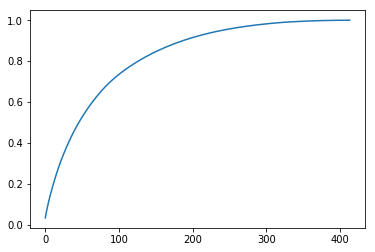

In [66]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

We can read from this chart: To capture over 90% of the variance, we'd need to keep around 200 components.

In [73]:
# How much variance we'd capture with the first 200 components
cumulative_explained_variance[200]

0.91544629459845883

**Initializing and fitting another PCA transformation.**
* This time, we'll only keep 200 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.

In [77]:
# Initialize PCA transformation, only keeping 200 components
pca = PCA(n_components=200)
# Fit and transform item_data_scaled
pca_items = pca.fit_transform(item_scaled_data)
# Display shape of PCA_items to confirm there are 200 items
pca_items.shape

(414, 200)

**For convenience we'll convert <code style="color:crimson">PCA_items</code> into a new dataframe.**
* We'll name the columns and update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.

In [80]:
# Put PCA_items into a dataframe
items_pca = pd.DataFrame(pca_items, index =item_data.index )
# Name the columns
items_pca.columns = {'PC{}'.format(i+1) for i in range(pca_items.shape[1])}
# Display first 5 rows
items_pca.head()

,PC27,PC159,PC192,PC32,PC2,PC29,PC26,PC76,PC152,PC11,...,PC74,PC92,PC115,PC153,PC21,PC154,PC181,PC79,PC90,PC83
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876140,4.828917,-0.495545,3.093850,-0.633706,-11.534090,2.161996,7.116958,5.336008,4.424413,...,0.285553,-0.036518,0.304538,0.066348,0.091724,0.081520,0.031085,-0.026535,0.348184,-0.175728
12348,-4.219837,1.226210,-1.881921,-0.174357,0.818016,1.160841,-0.871705,-0.846643,0.460261,0.854213,...,0.460968,-4.765365,0.181128,-0.060220,2.299782,0.318007,-4.587247,7.146414,-2.880113,-1.147965
12349,-1.260846,2.387661,-0.073149,-1.119164,-0.034330,-3.715382,-0.343606,-0.149039,-0.789982,-0.379266,...,-0.858036,3.032593,0.626667,-4.306286,-0.254076,-0.276820,-2.182513,2.463688,-0.178603,-0.136216
12350,-4.929320,-0.714861,-1.580931,-0.469759,-0.116283,0.647828,0.112902,-1.336310,1.547058,-1.190383,...,0.796385,0.850550,0.382694,-1.900388,0.025241,2.102687,0.208891,-1.107115,-1.130929,3.428857
12352,-2.053114,2.110949,0.184807,0.128238,0.087786,-1.943572,2.383302,0.899611,-0.671981,0.081432,...,1.952904,-0.335511,1.161181,-0.013836,1.580158,1.933953,-0.662787,1.746364,-0.679615,-0.423264


Now we have a dataframe of 200 customer-level principal component features.
Generated from the 200 principal components that explained the most variance for the original features.
- The index of this PCA item dataframe contains CustomerID's, which will make it possible for us to join this to our analytical base table from Step 1.

**Saving this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* We will **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [82]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

Essential steps:
* how PCA works on an oval blob.
* Contrast plots of the original features against principal component features.
* Intepret cumulative explained variance.
* Reduce the dimensionality of the item dataset using PCA.